# 1. 오픈채팅방

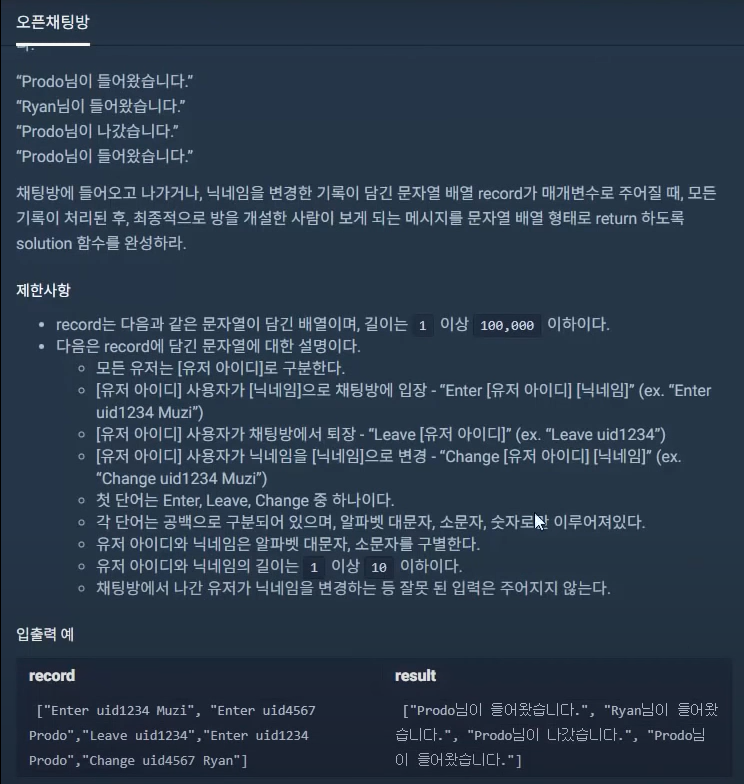

## 핵심 
1. 메시지가 출력되는 경우는 들어오는 경우와 나가는 경우 두 가지 뿐이다.
2. 닉네임은 변경되는 경우는 들어오는 경우와 변경하는 경우 두 가지 뿐이다.

## 전략 
1. 리스트를 돌면서 Enter, Change를 만나면 닉네임을 저장한다 
2. 다시 리스트를 돌면서 Enter, Leave를 만나면 특정 사용자 ID의 닉네임을 출력

In [11]:
def solution(record) : 
    answer = []
    user_name = {}
    
    for rec in record : 
        if rec.split(' ')[0] == 'Enter' or rec.split(' ')[0] == 'Change' : 
            user_name[rec.split(' ')[1]] = rec.split(' ')[2]
    
    for rec in record : 
        if rec.split(' ')[0] == 'Enter' : 
            answer.append(user_name[rec.split(' ')[1]]  + '님이 들어왔습니다.')
        if rec.split(' ')[0] == 'Leave' : 
            answer.append(user_name[rec.split(' ')[1]]  + '님이 나갔습니다.')
    
    return answer

In [12]:
solution(["Enter uid1234 Muzi", "Enter uid4567 Prodo","Leave uid1234","Enter uid1234 Prodo","Change uid4567 Ryan"])

['Prodo님이 들어왔습니다.', 'Ryan님이 들어왔습니다.', 'Prodo님이 나갔습니다.', 'Prodo님이 들어왔습니다.']

# 2. 실패율

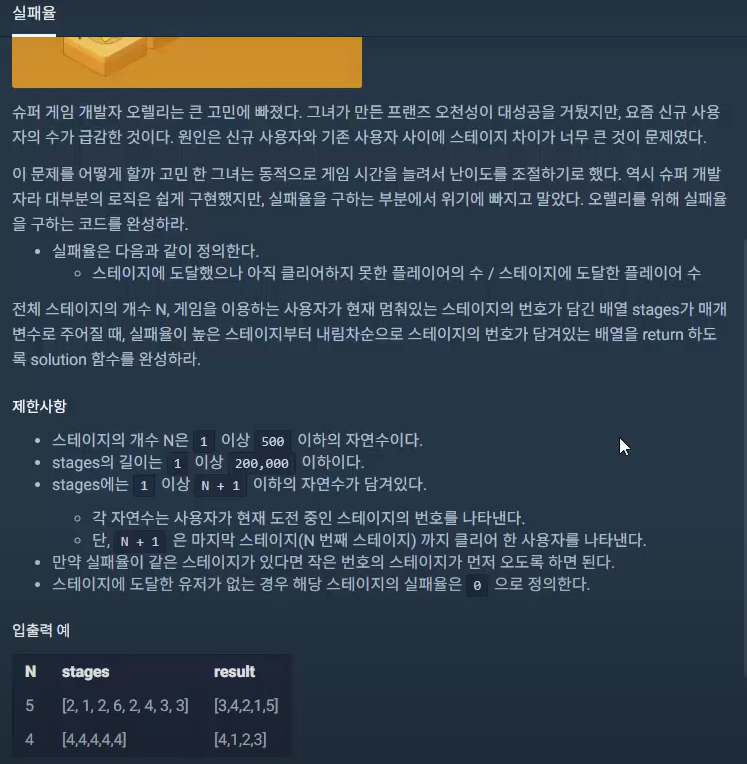

In [29]:
N = 5 
stages = [2,1,2,6,2,4,3,3]


In [45]:
def solution(N, stages) : 
    answer = [] 
    length = len(stages) 
    for i in range(1, N+1) : 
        count = stages.count(i)
        if length == 0 : 
            fail = 0 
        else : 
            fail = count / length 
        answer.append((i, fail))
        length -= count 
        
    answer = sorted(answer, key = lambda x : x[1], reverse = True)
    answer = [i[0] for i in answer]
    return answer

In [46]:
solution(N, stages)

[3, 4, 2, 1, 5]

# 3. 후보키

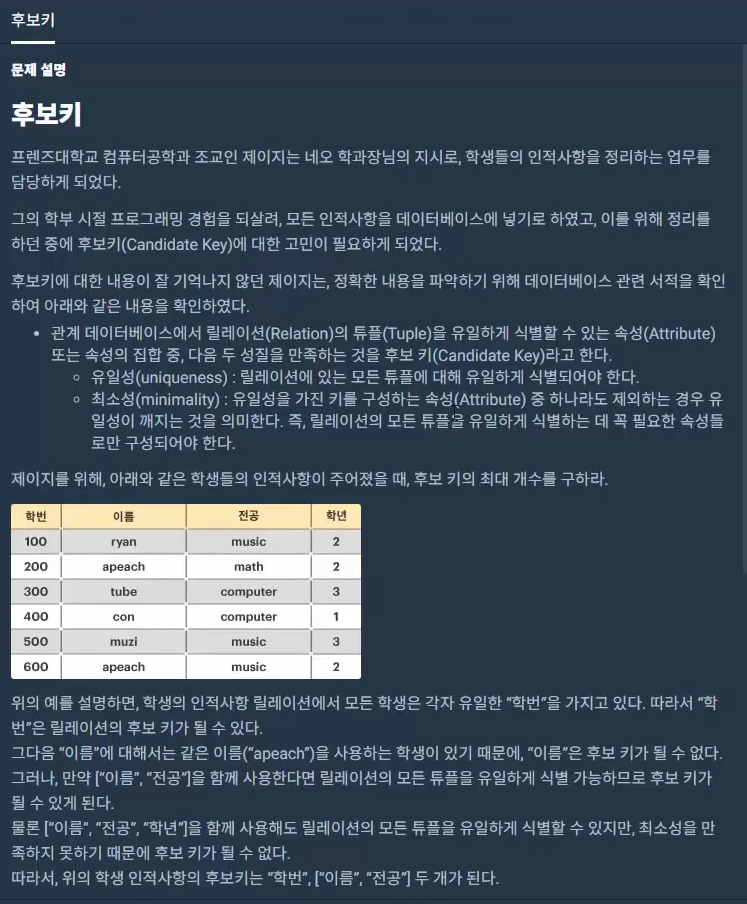

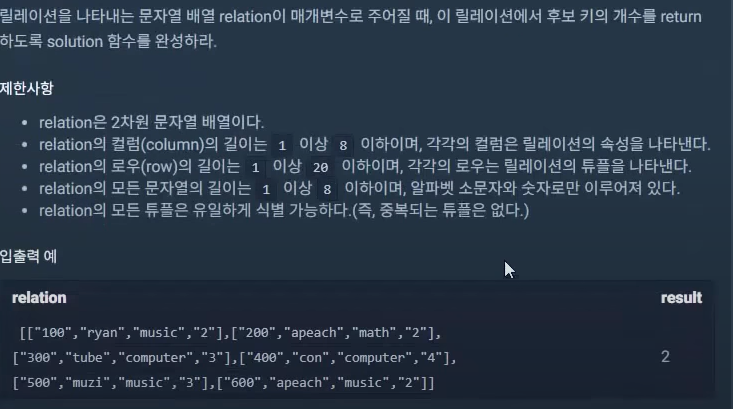

## 핵심
1. 부분집합 계산 함수를 통해서 모든 쌍을 계산 
2. 모든 쌍에 대해서 유일성을 만족하는 경우만을 계산 
3. 유일성을 만족하는 경우 최소성을 만족하는 경우만 남긴다

## 전략
**3가지 파트로 구성**
1. 모든 부분집합 계산 
2. 부분집합 중에서 유일성을 만족하는 부분집합 계산 
3. 유일성을 만족하는 부분집합 중에서 최소성 만족하는 부분집합만을 남기기 

In [1]:
relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

In [126]:
from itertools import chain, combinations 
def get_all_subset(iterable) : 
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

def get_all_unique_subset(relation) : 
    subset_list = get_all_subset(list(range(len(relation[0])))) 
    unique_list = [] 
    
    for subset in subset_list : 
        unique = True 
        values = set()
        
        for row in range(len(relation)) : 
            value = '' 
            for col in subset : 
                value += relation[row][col]
            
            if value in values :
                unique = False 
                break
            
            values.add(value)
            
        if unique : 
            unique_list.append(subset)
            
    return unique_list



def solution(relation):
    unique_list = get_all_unique_subset(relation) 
    unique_list = sorted(unique_list, key = lambda x : len(x))
    answer = [] 
    
    for subset in unique_list : 
        check = True
        subset = set(subset) 
        for ans in answer : 
            if ans.issubset(subset) : 
                check = False
        if check == True : 
            answer.append(subset)
    return len(answer)

In [127]:
solution(relation)

2

# 4. 무지의 먹방 라이브

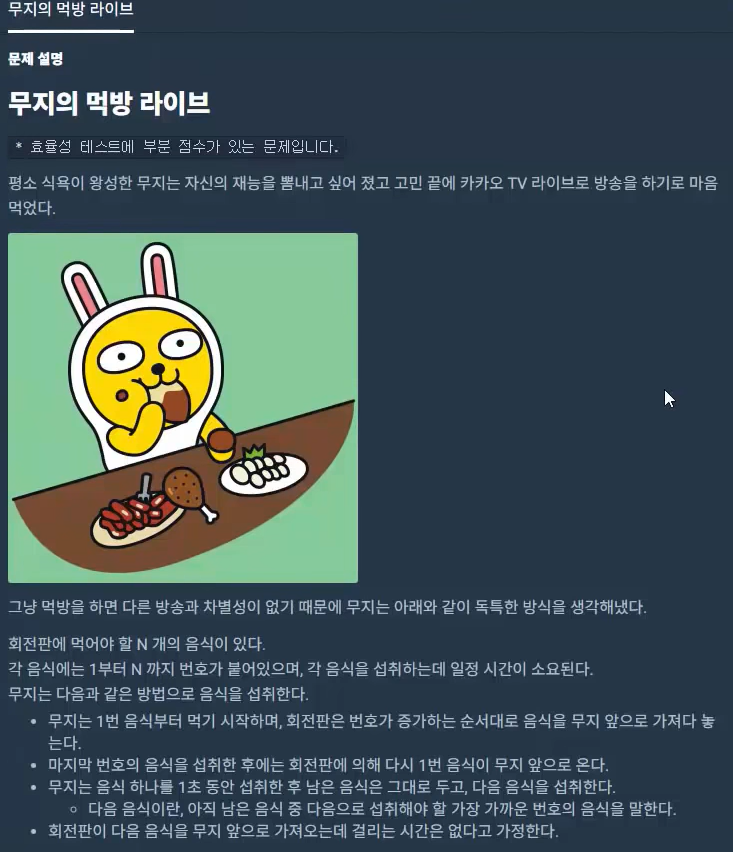

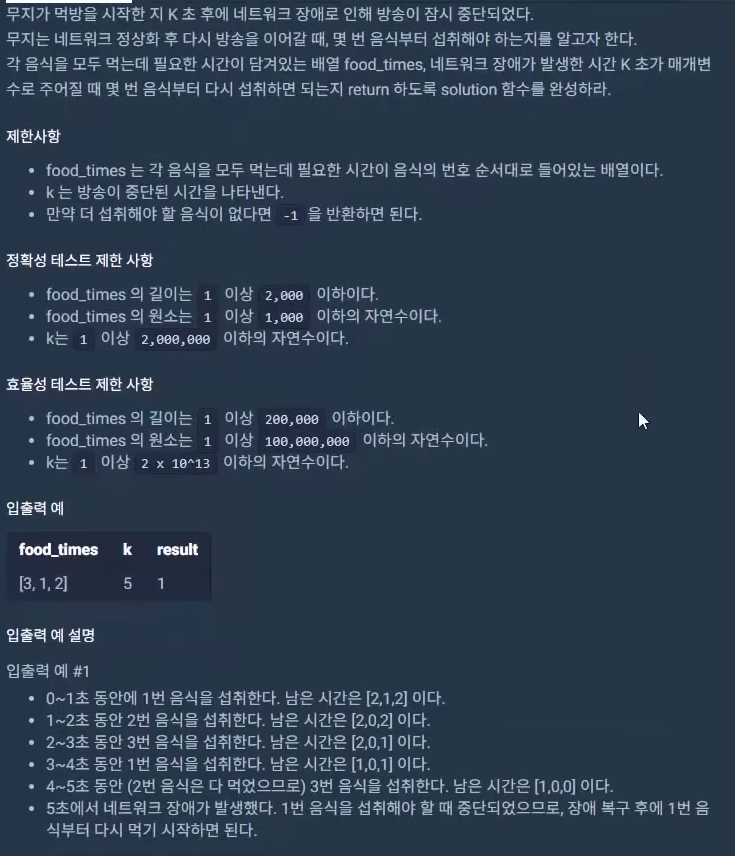

In [157]:
def solution(food_times, k):
    n = len(food_times)
    foods = []
    for i in range(n) : 
        foods.append((i+1, food_times[i]))
        
    foods = sorted(foods, key = lambda x : x[1])
    
    pretime = 0 
    
    for i, food in enumerate(foods) :
        diff = food[1]  - pretime
        spend = n * diff
        
        if spend <= k : 
            k -= spend 
            n -= 1 
            pretime = food[1]
            
        else : 
            k %= n 
            sublist = sorted(foods[i:])
            return sublist[k][0]
        
    return -1 
    

In [158]:
solution([3,1,2], 5)

1